In [61]:
# Importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform, loguniform
import category_encoders as ce

In [34]:
# Importing datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Quick look at datasets
display(train.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
display(test.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# Summary stats of our data
print(train.describe())
print(test.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [6]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
# Looks like there are null-values in our data

In [9]:
# Data cleaning
missing_train = train.isnull().sum()
missing_train = missing_train[missing_train > 0]
print('# of nulls in train dataset')
display(missing_train)

# of nulls in train dataset


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
# Extremely high number of nulls found in Alley, PoolQC, Fence, and MiscFeature. Will drop since they likely won't correlate with price

In [11]:
missing_test = test.isnull().sum()
missing_test = missing_test[missing_test > 0]
print('# of nulls in test dataset')
display(missing_test)

# of nulls in test dataset


MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [12]:
# Final decision to drop all columns with missing values
train.drop(missing_train.index, axis=1, inplace=True)

In [13]:
print('# of duplicates in train dataset:')
train.duplicated().sum()

# of duplicates in train dataset:


0

In [14]:
print('# of duplicates in test dataset:')
test.duplicated().sum()

# of duplicates in test dataset:


0

In [15]:
# No duplicates found

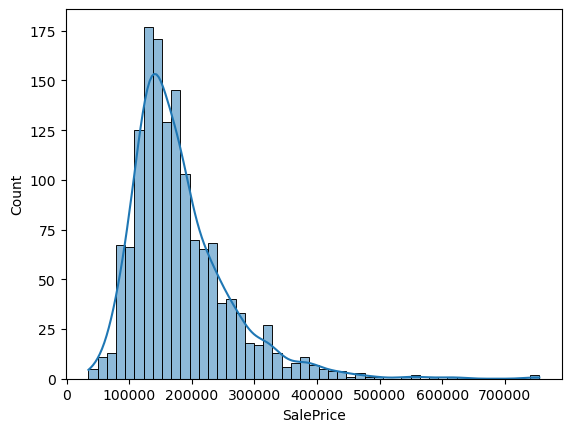

In [16]:
sns.histplot(train.SalePrice, kde=True)
plt.show()
plt.close()

In [17]:
skewness = train['SalePrice'].skew()
print(skewness)
# Skewed to the right, outliers shown in histogram, outliers will not be removed due to lower score

1.8828757597682129


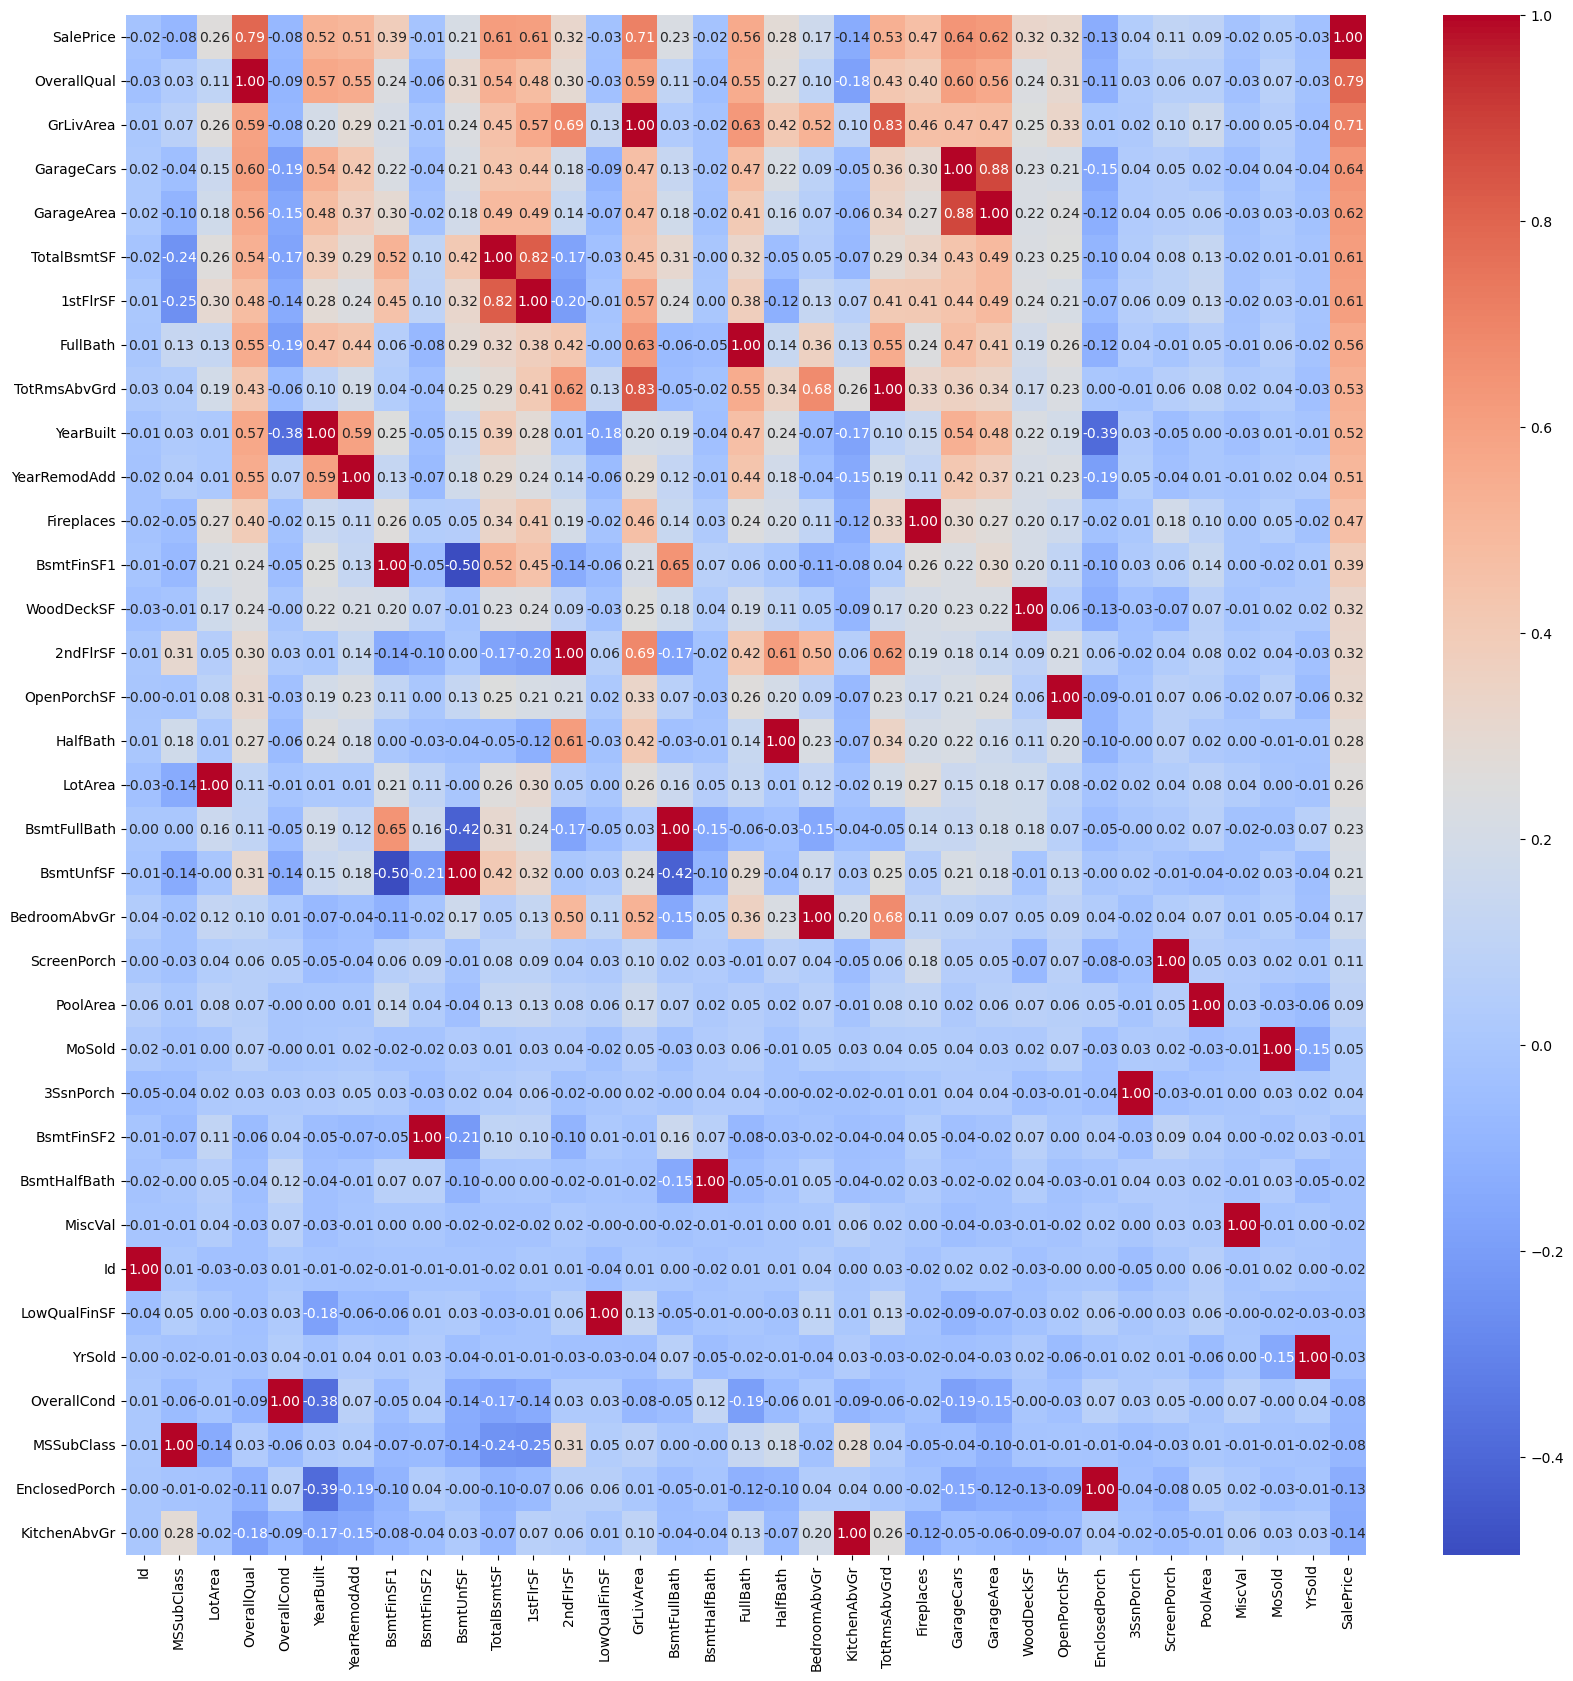

In [19]:
# Numeric features and their correlation with SalePrice
correlation_matrix = numeric.corr()
correlation_matrix_sorted = correlation_matrix.sort_values(by='SalePrice', ascending=False)
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix_sorted, annot=True, cmap='coolwarm', fmt="0.2f")
plt.show()

In [62]:
categorical_col = train.select_dtypes(include=['object'])
categorical_cols = categorical_col.columns.to_list()

In [63]:
print(categorical_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [66]:
# Introduce categorical variables
encoder = ce.TargetEncoder(cols=categorical_cols)

X_encoded = encoder.fit_transform(train.drop(columns=['SalePrice']), train['SalePrice'])
test_encoded = encoder.transform(test)

In [67]:
display(X_encoded)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,191004.994787,65.0,8450,181130.538514,183452.131483,164754.818378,180183.746758,180950.95682,...,0,0,180404.663455,187596.837998,182046.410384,0,2,2008,173401.836622,175202.219533
1,2,20,191004.994787,80.0,9600,181130.538514,183452.131483,164754.818378,180183.746758,180950.95682,...,0,0,180404.663455,187596.837998,182046.410384,0,5,2007,173401.836622,175202.219533
2,3,60,191004.994787,68.0,11250,181130.538514,183452.131483,206101.665289,180183.746758,180950.95682,...,0,0,180404.663455,187596.837998,182046.410384,0,9,2008,173401.836622,175202.219533
3,4,70,191004.994787,60.0,9550,181130.538514,183452.131483,206101.665289,180183.746758,180950.95682,...,0,0,180404.663455,187596.837998,182046.410384,0,2,2006,173401.836622,146537.060693
4,5,60,191004.994787,84.0,14260,181130.538514,183452.131483,206101.665289,180183.746758,180950.95682,...,0,0,180404.663455,187596.837998,182046.410384,0,12,2008,173401.836622,175202.219533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,191004.994787,62.0,7917,181130.538514,183452.131483,164754.818378,180183.746758,180950.95682,...,0,0,180404.663455,187596.837998,182046.410384,0,8,2007,173401.836622,175202.219533
1456,1457,20,191004.994787,85.0,13175,181130.538514,183452.131483,164754.818378,180183.746758,180950.95682,...,0,0,180404.663455,148751.125281,182046.410384,0,2,2010,173401.836622,175202.219533
1457,1458,70,191004.994787,66.0,9042,181130.538514,183452.131483,164754.818378,180183.746758,180950.95682,...,0,0,180404.663455,178967.014004,152738.324575,2500,5,2010,173401.836622,175202.219533
1458,1459,20,191004.994787,68.0,9717,181130.538514,183452.131483,164754.818378,180183.746758,180950.95682,...,0,0,180404.663455,187596.837998,182046.410384,0,4,2010,173401.836622,175202.219533


In [23]:
# Building the RandomForest model

In [36]:
y = train['SalePrice']

In [68]:
train_X, val_X, train_y, val_y = train_test_split(X_encoded, y, random_state=1)

In [26]:
# Finding max leaf nodes and n estimator that best optimizes RMSE

In [27]:
def get_rmse(max_leaf_nodes, train_X, train_y):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    val_predictions = model.predict(val_X)
    rmse = np.sqrt(mean_squared_error(val_y, val_predictions))
    return(rmse)

In [28]:
L = [5, 25, 50, 100, 500, 1000, 1500, 2000, 2500]
for i in L:
    print(get_rmse(i, train_X, train_y))

22699.92209264492
6259.985564614628
6128.191745209624
6092.71812907995
6080.89189911782
6080.89189911782
6080.89189911782
6080.89189911782
6080.89189911782


In [29]:
# Best max leaf node is 1000

In [ ]:
# best n estimator is 1500

In [ ]:
# We will use max_leaf_node-1000 and n_estimator=1500 for our final model

In [ ]:
param = {
    'n_estimators':randint(1400,1600),
    'max_depth': randint(3,30),
    'min_samples_split': randint(2,10),
    'min_samples_leaf': randint(1,10),
    'max_features': uniform(0.3, 0.7),
}

random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=1),
    param_distributions=param,
    n_iter=50,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=0,
    random_state=1
)
random_search.fit(train_X, train_y)

In [ ]:
random_search.best_params_

In [69]:
model = RandomForestRegressor(n_estimators=1500, max_leaf_nodes=1000, max_depth=14, max_features='log2', min_samples_leaf=4, min_samples_split=10, bootstrap=True, oob_score=True, random_state=1)
model.fit(train_X, train_y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y)


,n_estimators,1500
,criterion,'squared_error'
,max_depth,14
,min_samples_split,10
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,1000
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [70]:
val_predictions = model.predict(val_X)

In [71]:
model.oob_score_

0.8301000628492726

In [72]:
rmse = np.sqrt(mean_squared_error(val_y, val_predictions))
r2 = r2_score(val_y, val_predictions)
print('RMSLE:', rmse, 'R-squared:', r2)

RMSLE: 32061.620998232607 R-squared: 0.8468773092220845


In [ ]:
# Encode both train and test then align them

In [51]:
# Creating predictions using the test dataset

In [73]:
test_pred = model.predict(test_encoded)

In [ ]:
# XGBoost

In [ ]:
param = {
     'n_estimators': randint(1000, 2000),
    'learning_rate': loguniform(1e-3, 3e-1),
    'max_depth': randint(2, 12),
    'subsample': uniform(0.6, 0.4),
    'reg_alpha': loguniform(1e-5, 10),
    'reg_lambda': loguniform(0.1, 5),
    'min_child_weight': uniform(0.1,0.9),
    'colsample_bytree': uniform(0.5,0.5),
}

random_search = RandomizedSearchCV(
    estimator=XGBRegressor(tree_method='hist',
                           objective='reg:squarederror',
                           booster='gbtree',
                           random_state=1),
    param_distributions=param,
    n_iter=50,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=0,
    random_state=1
)

random_search.fit(train_X, train_y)

In [ ]:
print(random_search.best_params_)

In [ ]:
print(random_search.best_score_)

In [44]:
my_model = XGBRegressor(learning_rate = 0.02, max_depth= 2, n_estimators= 5000, reg_alpha = 0.013, reg_lambda = 1.785749673094052, subsample= 0.5, min_child_weight=2, colsample_bytree= 0.5, early_stopping_rounds=20, eval_metric='rmse')
my_model.fit(train_X, train_y, eval_set=[(val_X, val_y)])

[0]	validation_0-rmse:81256.65351
[1]	validation_0-rmse:80363.89948
[2]	validation_0-rmse:79065.29255
[3]	validation_0-rmse:77825.89455
[4]	validation_0-rmse:76647.15341
[5]	validation_0-rmse:75988.78775
[6]	validation_0-rmse:75286.00160
[7]	validation_0-rmse:74129.77032
[8]	validation_0-rmse:72977.37295
[9]	validation_0-rmse:72285.34316
[10]	validation_0-rmse:71200.61590
[11]	validation_0-rmse:70441.57678
[12]	validation_0-rmse:69382.48492
[13]	validation_0-rmse:68613.57054
[14]	validation_0-rmse:67554.81009
[15]	validation_0-rmse:66808.41431
[16]	validation_0-rmse:66156.49353
[17]	validation_0-rmse:65526.31469
[18]	validation_0-rmse:64570.43481
[19]	validation_0-rmse:63640.36622
[20]	validation_0-rmse:62674.78203
[21]	validation_0-rmse:62079.77707
[22]	validation_0-rmse:61160.04436
[23]	validation_0-rmse:60661.17849
[24]	validation_0-rmse:60061.92855
[25]	validation_0-rmse:59458.26260
[26]	validation_0-rmse:58874.91969
[27]	validation_0-rmse:57977.35056
[28]	validation_0-rmse:57138.0

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.5
,device,None
,early_stopping_rounds,20
,enable_categorical,False
,eval_metric,'rmse'


In [45]:
preds = my_model.predict(val_X)

In [46]:
xgb_r2 = r2_score(preds, val_y)
xgb_rmsle = np.sqrt(mean_squared_error(preds, val_y))
print(xgb_rmsle, xgb_r2)

11245.318670451274 0.9791368842124939


In [53]:
test_preds = my_model.predict(test_encoded)

In [54]:
# Submission file for the competition

In [74]:
submission = pd.DataFrame({
    "ID": test['Id'],
    "SalePrice": test_pred})

In [75]:
submission.to_csv('submission.csv', index=False)